# **INTELIGENCIA ARTIFICIAL II**

## Unidad 3
## Laboratorio 3. Lógica Difusa
### Período: Mayo 2020 - Octubre 2020

### Paralelo A
### Equipo #3

## **INTEGRANTES:**

**- Constante Mieles Rene**

**- Macias Ampuero Douglas**

**- Reyes Sánchez Anny**

**- Rodrigues Quimiz Josselyn**

**- Meza Jativa Jorge**

**- Tamariz Plua Marcelo**

**- Zambrano Triviño Jose**

## Problema de la propina
Se desea calcular la propina que debería darse en dependencia de la calidad  de la comida y del servicio recibido.

La calidad del servicio se representa por medio de 3 conjuntos difusos con funciones de pertenencia triangulares (poor, acceptable, amazing), en un rango de 0 a 10.
La calidad de la comida se representa por medio de 3 conjuntos difusos con funciones de pertenencia triangulares (bad, decent, great), en un rango de 0 a 10.
La propina se representa por medio de 3 conjuntos difusos con funciones de pertenencia triangulares (low, medium, high) en un rango del 0% al 25%
Se utilizarán las siguientes reglas:

IF the service was good or the food quality was good, THEN the tip will be high.

IF the service was average, THEN the tip will be medium.

IF the service was poor and the food quality was poor THEN the tip will be low.

### Nota: Las reglas que se implementan en el ejemplo no se corresponden con estas. Sino que son enunciadas directamente antes del código

Taking the tipping example full circle, if we were to create a controller which estimates the tip we should give at a restaurant, we might structure it as such:

Antecedents (Inputs) service Universe (ie, crisp value range): How good was the service of the waitress, on a scale of 1 to 10? Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing

food quality Universe: How tasty was the food, on a scale of 1 to 10? Fuzzy set: bad, decent, great

Consequents (Outputs) tip Universe: How much should we tip, on a scale of 0% to 25% Fuzzy set: low, medium, high

Rules

IF the service was good or the food quality was good, THEN the tip will be high.

IF the service was average, THEN the tip will be medium.

IF the service was poor and the food quality was poor THEN the tip will be low.

Usage

If I tell this controller that I rated: the service as 9.8, and the quality as 6.5, it would recommend I leave: a 20.2% tip.

In [22]:
# !pip3 install -U scikit-fuzzy

In [23]:
import numpy as np
# conda install -c conda-forge scikit-fuzzy 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

# Instalar skfuzzy: pip install -U scikit-fuzzy

# Generate universe variables
# * Quality and service on subjective ranges [0, 10]
# * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip = np.arange(0, 26, 1)

In [24]:
# Generate fuzzy membership functions
qual_lo = fuzz.trapmf(x_qual, [0,0,1, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

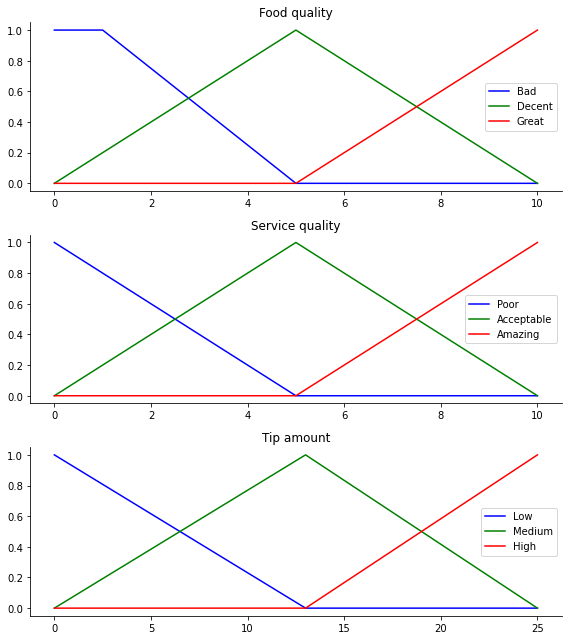

In [25]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()
ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()
ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()
# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

### Fuzzy rules
Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our example, consider three simple rules:

If the food is poor OR the service is poor, then the tip will be low

If the service is average, then the tip will be medium

If the food is good OR the service is good, then the tip will be high.

Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable tip is a challenge. This is the kind of task at which fuzzy logic excels.

In [39]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
food_qual = 6.5
serv_qual = 3.8
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, food_qual)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, food_qual)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, food_qual)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, serv_qual)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, serv_qual)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, serv_qual)

In [40]:
qual_level_hi

0.30000000000000004

In [41]:
# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
tip_activation_lo = np.fmin(active_rule1, tip_lo) # removed entirely to 0

# For rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(serv_level_md, tip_md)

# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

In [42]:
tip_activation_md

array([0.        , 0.07692308, 0.15384615, 0.23076923, 0.30769231,
       0.38461538, 0.46153846, 0.53846154, 0.61538462, 0.69230769,
       0.76      , 0.76      , 0.76      , 0.76      , 0.76      ,
       0.76      , 0.75      , 0.66666667, 0.58333333, 0.5       ,
       0.41666667, 0.33333333, 0.25      , 0.16666667, 0.08333333,
       0.        ])

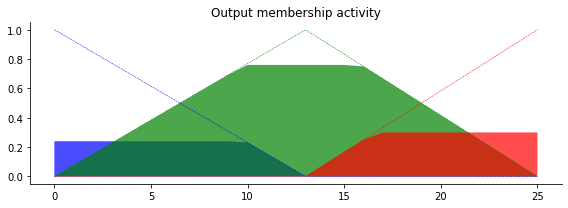

In [43]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

In [44]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo,np.fmax(tip_activation_md, tip_activation_hi))
# Calculate defuzzified result
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip) # for plot

In [45]:
tip_activation

0.76

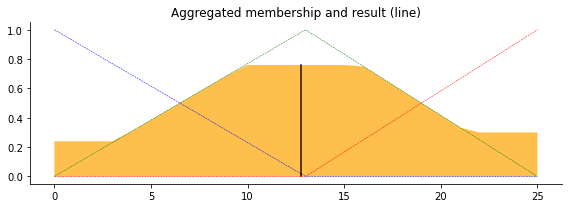

In [46]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')
# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

### DISCUSION AL CAMBIAR LOS VALORES DE ENTRADA

Al poner que la calidad de la comida y la calidad del servicio fueron un 8, en ambos graficos se
denota que la atencion en general fue buena, al mostrarse el aumento en el lado derecho de las
figuras.

### PARTE 2 - CAMBIAR EL CONJUNTO DE REGLAS, UTILIZAR AND EN LUGAR DE OR

In [47]:
food_qual = 5
serv_qual = 9
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, food_qual)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, food_qual)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, food_qual)
serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, serv_qual)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, serv_qual)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, serv_qual)

In [48]:
# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
tip_activation_lo = np.fmin(active_rule1, tip_lo) # removed entirely to 0
# For rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(serv_level_md, tip_md)
# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)
# regla 4 si el servicio es bueno pero la comida es media, propina media
active_rule4 = np.fmin(serv_level_hi, qual_level_md)
tip_activation_md= np.fmax(active_rule4, tip_md)
#regla 5 si la comida es buena pero el servicio es malo, propina baja
active_rule5 = np.fmin(serv_level_lo, qual_level_hi)
tip_activation_lo= np.fmax(active_rule5, tip_lo)
#regla 6 si la comida es decente y el servicio es bueno, propina alta
active_rule6 = np.fmin(serv_level_hi, qual_level_md)
tip_activation_lo= np.fmax(active_rule6, tip_hi)

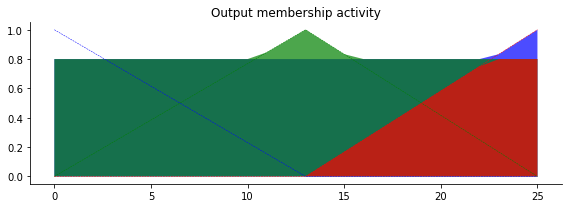

In [49]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

In [50]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo,np.fmax(tip_activation_md, tip_activation_hi))
# Calculate defuzzified result
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip) # for plot

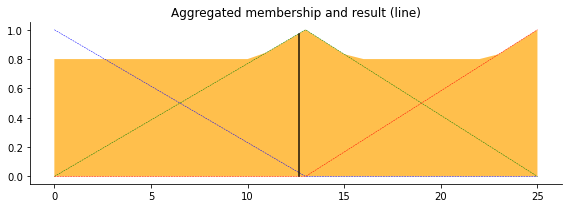

In [51]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')
# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

Al tener una comida decente y un servicio bueno, la propina sera alta, segun la regla 6 de las
nuevas reglas creadas por nosotros.